In [1]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download("stopwords")
import re


from nltk.corpus import stopwords
from nltk.stem.porter import *
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Load the datafame

In [3]:
df.to_csv("/content/Grade 3 & 4 Dataset.csv", encoding="utf-8-sig", index=False)


### Create the excel file

In [4]:
from openpyxl import Workbook

wb = Workbook()
ws = wb.active

for row in df.values:
    ws.append(list(row))

wb.save("3_4_sinhala1.xlsx")


In [24]:
df=pd.read_csv("/content/3_4_sinhala1.csv", encoding="utf-8")
df.head(10)


,Sentences,class
0,මම බත් කමි.,correct
1,මම තේ බොමි.,correct
2,මම ගමට යෙමි.,correct
3,මම ගීයක් ගයමි.,correct
4,මම පොත ලියමි.,correct
5,මම මුහුණ සෝදමි.,correct
6,මම ඇය දකිමි.,correct
7,මම තෑග්ගක් දෙමි.,correct
8,නුඹ බත් කන්නෙහි.,correct
9,නුඹ තේ බොන්නෙහි.,correct


In [25]:
df.isnull().sum()
df.isna()
df.dropna(axis=0,inplace=True)
df.head()
print(df["class"].value_counts())

class
correct      1038
incorrect    1038
Name: count, dtype: int64


### Find max word count

In [26]:
# Count words in each sentence
df["word_count"] = df["Sentences"].apply(lambda x: len(str(x).split()))

# Select sentences with max 4 words
df = df[df["word_count"] <= 4]

# Final x and y
x_filtered = df["Sentences"].tolist()
y_filtered = df["class"].tolist()

# Optional: drop helper column
df = df.drop(columns=["word_count"])

In [27]:
df

,Sentences,class
0,මම බත් කමි.,correct
1,මම තේ බොමි.,correct
2,මම ගමට යෙමි.,correct
3,මම ගීයක් ගයමි.,correct
4,මම පොත ලියමි.,correct
...,...,...
2074,බැලුවාය ඇය නැවත.,incorrect
2075,පත් වූයෙමු කනස්සල්ලට අපි.,incorrect
2076,සාගරයේ යාත්‍රා අපි කළෙමු.,incorrect
2077,බලා සිටියහ ඔවුහු නොඉවසිල්ලෙන්.,incorrect


### Recorrec the sentence

In [28]:
x_list=df["Sentences"]
y_list=df["class"]

In [29]:
def recorrect_sentence(sentence):
    # 1. Split the text
    words = sentence.split(" ")

    # 2. Check if last word length is 1 or 2 (to handle "ය" or "ය.")
    last_word = words[-1]

    if len(last_word.replace(".", "")) == 1:
        # 3. Combine last word with previous word
        words[-2] = words[-2] + last_word
        words.pop()  # remove last word

    return " ".join(words)




# Apply correction
corrected_list = [recorrect_sentence(text) for text in x_list]

# Output
for original, corrected in zip(x_list, corrected_list):
     print("Original :", original)
     print("Corrected:", corrected)
     print("-" * 40)


Original : මම බත් කමි.
Corrected: මම බත් කමි.
----------------------------------------
Original : මම තේ බොමි.
Corrected: මම තේ බොමි.
----------------------------------------
Original : මම ගමට යෙමි.
Corrected: මම ගමට යෙමි.
----------------------------------------
Original : මම ගීයක් ගයමි.
Corrected: මම ගීයක් ගයමි.
----------------------------------------
Original : මම පොත ලියමි.
Corrected: මම පොත ලියමි.
----------------------------------------
Original : මම මුහුණ සෝදමි.
Corrected: මම මුහුණ සෝදමි.
----------------------------------------
Original : මම ඇය දකිමි.
Corrected: මම ඇය දකිමි.
----------------------------------------
Original : මම තෑග්ගක් දෙමි.
Corrected: මම තෑග්ගක් දෙමි.
----------------------------------------
Original : නුඹ බත් කන්නෙහි.
Corrected: නුඹ බත් කන්නෙහි.
----------------------------------------
Original : නුඹ තේ බොන්නෙහි.
Corrected: නුඹ තේ බොන්නෙහි.
----------------------------------------
Original : නුඹ ගමට යන්නෙහි.
Corrected: නුඹ ගමට යන්නෙහි.
----------------------

In [30]:
def get_max_word_count(text_list):
    max_count = 0
    for text in text_list:
        words = text.split()
        if len(words) > max_count:
            max_count = len(words)
    return max_count


def get_min_word_count(text_list):
    if not text_list:
        return 0  # Return 0 if the list is empty

    min_count = float('inf')  # Initialize with a very large number
    for text in text_list:
        words = text.split()
        if len(words) < min_count:
            min_count = len(words)
    return min_count




Maximum word count in text_list: 4


In [ ]:

# Get the maximum word count from pre_text_list
max_word_count = get_max_word_count(corrected_list)
print(f"Maximum word count in text_list: {max_word_count}")

## Preprocess

In [38]:
import re

def pre_text(tweet):
    ''' Convert sentence into indexed word sequence '''

    # convert to lowercase (safe for Sinhala)
    text = tweet.lower()

    # remove punctuation
    text = re.sub(r'[,.!?#@$%&]', '', text)

    # tokenize
    words = text.split()

    # add word index labels
    indexed_words = []
    for i, word in enumerate(words, start=1):
        indexed_words.append(f"word{i} {word}")

    # add final word index (word{n+1})
    #indexed_words.append(f"word{len(words) + 1}")
    indexed_words.append("end")

    final_text = " ".join(indexed_words)
    return final_text

print("\nOriginal tweet ->", corrected_list[850])
print("\nProcessed tweet ->", pre_text(corrected_list[850]))


Original tweet -> සමහර ළමයි ඔඩොක්කුවල පුරවාගනිති.

Processed tweet -> word1 සමහර word2 ළමයි word3 ඔඩොක්කුවල word4 පුරවාගනිති end


In [43]:
# Apply data processing to each tweet
pre_text_list = list(map(pre_text,corrected_list))

In [44]:
pre_text_list= [s for s in pre_text_list if len(s.split()) > 4]

print(pre_text_list)


['word1 මම word2 බත් word3 කමි end', 'word1 මම word2 තේ word3 බොමි end', 'word1 මම word2 ගමට word3 යෙමි end', 'word1 මම word2 ගීයක් word3 ගයමි end', 'word1 මම word2 පොත word3 ලියමි end', 'word1 මම word2 මුහුණ word3 සෝදමි end', 'word1 මම word2 ඇය word3 දකිමි end', 'word1 මම word2 තෑග්ගක් word3 දෙමි end', 'word1 නුඹ word2 බත් word3 කන්නෙහි end', 'word1 නුඹ word2 තේ word3 බොන්නෙහි end', 'word1 නුඹ word2 ගමට word3 යන්නෙහි end', 'word1 නුඹ word2 ගීයක් word3 ගයන්නෙහි end', 'word1 නුඹ word2 පොත word3 ලියන්නෙහි end', 'word1 නුඹ word2 නිවැරදි word3 කරෙහි end', 'word1 නුඹ word2 ඇය word3 දක්නෙහි end', 'word1 ඔහු word2 බත් word3 කයි end', 'word1 ඇය word2 තේ word3 බොයි end', 'word1 ඔහු word2 ගමට word3 යයි end', 'word1 ඇය word2 ගීයක් word3 ගයයි end', 'word1 ඔහු word2 පොත word3 ලියයි end', 'word1 ඇය word2 නිවැරදි word3 කරයි end', 'word1 ඔහු word2 එය word3 දකියි end', 'word1 ඇය word2 ඇදේ word3 නිදාගනීයි end', 'word1 ඔහු word2 ගසකට word3 නගියි end', 'word1 ඇය word2 ගමට word3 පැමිණෙයි end', 'word1 අපි w

In [46]:
print(pre_text_list)

['word1 මම word2 බත් word3 කමි end', 'word1 මම word2 තේ word3 බොමි end', 'word1 මම word2 ගමට word3 යෙමි end', 'word1 මම word2 ගීයක් word3 ගයමි end', 'word1 මම word2 පොත word3 ලියමි end', 'word1 මම word2 මුහුණ word3 සෝදමි end', 'word1 මම word2 ඇය word3 දකිමි end', 'word1 මම word2 තෑග්ගක් word3 දෙමි end', 'word1 නුඹ word2 බත් word3 කන්නෙහි end', 'word1 නුඹ word2 තේ word3 බොන්නෙහි end', 'word1 නුඹ word2 ගමට word3 යන්නෙහි end', 'word1 නුඹ word2 ගීයක් word3 ගයන්නෙහි end', 'word1 නුඹ word2 පොත word3 ලියන්නෙහි end', 'word1 නුඹ word2 නිවැරදි word3 කරෙහි end', 'word1 නුඹ word2 ඇය word3 දක්නෙහි end', 'word1 ඔහු word2 බත් word3 කයි end', 'word1 ඇය word2 තේ word3 බොයි end', 'word1 ඔහු word2 ගමට word3 යයි end', 'word1 ඇය word2 ගීයක් word3 ගයයි end', 'word1 ඔහු word2 පොත word3 ලියයි end', 'word1 ඇය word2 නිවැරදි word3 කරයි end', 'word1 ඔහු word2 එය word3 දකියි end', 'word1 ඇය word2 ඇදේ word3 නිදාගනීයි end', 'word1 ඔහු word2 ගසකට word3 නගියි end', 'word1 ඇය word2 ගමට word3 පැමිණෙයි end', 'word1 අපි w

In [47]:
len(pre_text_list)

1896

In [45]:
max_word_count = get_max_word_count(pre_text_list)
print(f"Maximum word count in pre_text_list: {max_word_count}")

Maximum word count in pre_list: 9


In [48]:


# Get the minimum word count from pre_text_list
min_word_count = get_min_word_count(pre_text_list)
print(f"Minimum word count in pre_text_list: {min_word_count}")

Minimum word count in pre_text_list: 5


## tokenize

In [49]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = 1900
max_len=9

def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequnences of intergers and then
    pad each sequence to the same length
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # return sequences
    return X, tokenizer

print('Before preProcessing \n', df['Sentences'][12])
print('Before Tokenization & Padding \n', pre_text_list[12])
X, tokenizer = tokenize_pad_sequences(pre_text_list)
print('After Tokenization & Padding \n', X[12])

Before preProcessing 
 නුඹ පොත ලියන්නෙහි.
Before Tokenization & Padding 
 word1 නුඹ word2 පොත word3 ලියන්නෙහි end
After Tokenization & Padding 
 [  1  13   2  16   4 511   3   0   0]


In [50]:
X[10]

array([  1,  13,   2,  39,   4, 279,   3,   0,   0], dtype=int32)

In [51]:
X[50]

array([   1,   47,    2,  162,    4, 1259,    3,    0,    0], dtype=int32)

In [52]:
word2idx = tokenizer.word_index
V = len(word2idx)
print('Found %s unique tokens.' % V)

Found 1329 unique tokens.


### Define X and y

In [53]:
from tensorflow.keras.utils import to_categorical
# softmax
# Map labels to integers
label_map = {"incorrect": 0, "correct": 1}  # assign 0/1
y_int= y_list.map(label_map).astype(int).values
print("Integer labels:", y_int)

Integer labels: [1 1 1 ... 0 0 0]


#### softmax

In [54]:
y_softmax= to_categorical(y_int, num_classes=2)
print("Softmax one-hot labels shape:", y_softmax.shape)
print(y_softmax[:5])

Softmax one-hot labels shape: (1896, 2)
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


#### sigmoid

In [ ]:
# sigmoid
y_binary = y_int.reshape(-1, 1)  # shape (num_samples, 1)
print("Binary labels shape:", y_binary.shape)
print(y_binary[:5])


Binary labels shape: (828, 1)
[[1]
 [1]
 [1]
 [1]
 [1]]


## Training testing split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,y_softmax, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)



In [56]:
print("X_train :",X_train.shape)
print("y_train :",y_train.shape)
print("x_test:",X_test.shape)
print("y_test ;",y_test.shape)
print(X_train[:5])
print(y_train[:5])

X_train : (1137, 9)
y_train : (1137, 2)
x_test: (380, 9)
y_test ; (380, 2)
[[   1  426    2  113    4  429    5 1012    3]
 [   1  500    2  104    4  105    5   23    3]
 [   1 1128    2    9    4  149    3    0    0]
 [   1   63    2  140    4  137    3    0    0]
 [   1  411    2  897    4  273    5  898    3]]
[[0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


In [58]:
print(X_val.shape)
print(y_val.shape)

(379, 9)
(379, 2)


## Training model

In [57]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout,BatchNormalization
from keras.metrics import Precision, Recall
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras import datasets

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses

from tensorflow.keras.optimizers import legacy as legacy_optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

### Model 1 architecture

In [64]:
vocab_size = 1900
epochs=10
embedding_size = 8
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8


sgd = SGD(learning_rate=learning_rate, momentum=momentum, nesterov=False)


# Sequential model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_shape=(max_len,)))
model.add(Conv1D(filters=4, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(8)))
model.add(Dropout(0.4))
model.add(Dense(2, activation='softmax'))
print(model.summary())



# model = Sequential()
# model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_shape=(max_len,)))
# model.add(Conv1D(filters=4, kernel_size=3, padding='same', activation='relu'))
# model.add(MaxPooling1D(pool_size=2))
# model.add(LSTM(8, return_sequences=True))
# model.add(Bidirectional(LSTM(8)))
# model.add(Dropout(0.4))
# model.add(Dense(1, activation='sigmoid'))
# print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 9, 8)           │        15,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 9, 4)           │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 4, 4)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 16)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,166 (63.15 KB)

 Trainable params: 16,166 (63.15 KB)

 Non-trainable params: 0 (0.00 B)

None


## save model

In [60]:
#saev the tokenizer
import pickle

# saving
with open('tokenizer_sentence_3_4.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('tokenizer_sentence_3_4.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [61]:
from keras.callbacks import EarlyStopping, ModelCheckpoint


model_filename = 'sentence_3_4.keras'

# Combine the directory and filename
model_path = model_filename

# Define the ModelCheckpoint callback
checkpoint = ModelCheckpoint(model_path, save_best_only=True, monitor='val_loss', verbose=1)

early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 10)



In [65]:
from tensorflow.keras.optimizers import Adam

# Compile model

# Compile with classification loss
model.compile(loss='categorical_crossentropy', optimizer= sgd,metrics=['accuracy', Precision(), Recall()])
# Compile with binary loss
#model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])


In [66]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

epochs=50


# # Train model
history = model.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=16, epochs=epochs, verbose=1,
                    callbacks = [checkpoint,early_stop])



Epoch 1/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.4644 - loss: 0.7048 - precision_1: 0.4644 - recall_1: 0.4644
Epoch 1: val_loss improved from inf to 0.69844, saving model to sentence_3_4.keras
72/72 ━━━━━━━━━━━━━━━━━━━━ 10s 140ms/step - accuracy: 0.4648 - loss: 0.7049 - precision_1: 0.4648 - recall_1: 0.4648 - val_accuracy: 0.4644 - val_loss: 0.6984 - val_precision_1: 0.4644 - val_recall_1: 0.4644
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.4402 - loss: 0.7002 - precision_1: 0.4402 - recall_1: 0.4402
Epoch 2: val_loss did not improve from 0.69844
72/72 ━━━━━━━━━━━━━━━━━━━━ 11s 156ms/step - accuracy: 0.4408 - loss: 0.7002 - precision_1: 0.4408 - recall_1: 0.4408 - val_accuracy: 0.4644 - val_loss: 0.7261 - val_precision_1: 0.4644 - val_recall_1: 0.4644
Epoch 3/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.5235 - loss: 0.7012 - precision_1: 0.5235 - recall_1: 0.5235
Epoch 3: val_loss improved from 0.69844 to 0.69267, saving model to sente

## Models evaluation

In [67]:
from keras.models import load_model
#Load model
model = load_model(r'/content/sentence_3_4.keras')


# Evaluate model on the test set
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)
# Print metrics
print('')
print('Accuracy  : {:.4f}'.format(accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
#print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))


Accuracy  : 0.8474
Precision : 0.8474
Recall    : 0.8474


## Confution metrix

Model 1
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step

/usr/local/lib/python3.12/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


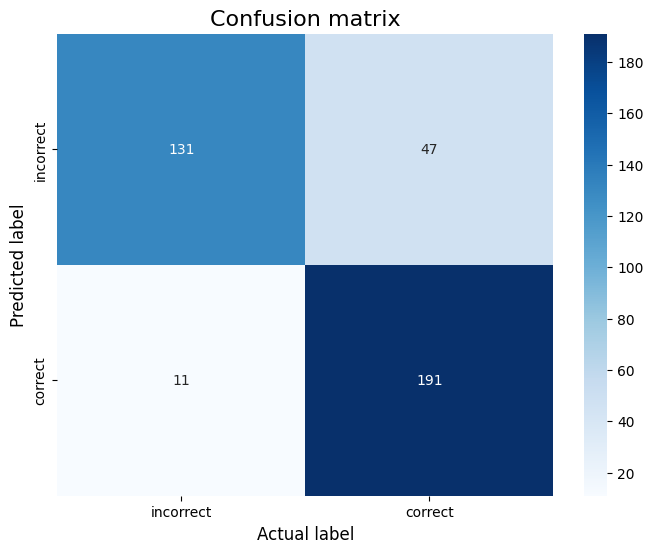

In [68]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''

    sentiment_classes = ['incorrect', 'correct']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(np.array(y_test),axis=1), np.argmax(y_pred, axis=1))
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d',
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)
print("Model 1")
plot_confusion_matrix(model, X_test, y_test)


In [69]:
def pre_text_grammer(tweet):
    ''' Convert sentence into indexed word sequence '''

    # convert to lowercase (safe for Sinhala)
    text = tweet.lower()

    # remove punctuation
    text = re.sub(r'[,.!?#@$%&]', '', text)

    # tokenize
    words = text.split()

    # add word index labels
    indexed_words = []
    for i, word in enumerate(words, start=1):
        indexed_words.append(f"word{i} {word}")

    # add final word index (word{n+1})
    #indexed_words.append(f"word{len(words) + 1}")
    indexed_words.append("end")

    final_text = " ".join(indexed_words)
    return final_text




In [76]:
from keras.models import load_model

# Load model
model_new = load_model('/content/sentence_3_4.keras')

# loading tokenizer
with open('/content/tokenizer_sentence_3_4.pickle', 'rb') as handle:
    tokenizer_new = pickle.load(handle)

def predict_class(text):
    '''Function to predict sentiment class of the passed text'''


    sentiment_classes = ['incorrect', 'correct']
    max_len=9
    final_text=pre_text_grammer(text)
    # Transforms text to a sequence of integers using a tokenizer object
    xt = tokenizer_new.texts_to_sequences([final_text])
    # Pad sequences to the same length
    xt = pad_sequences(xt, padding='post', maxlen=max_len)
    new_sequences = np.array(xt)

    # Do the prediction using the loaded model
    yt = model_new.predict(new_sequences).argmax(axis=1)
    print(yt)
    # Print the predicted sentiment
    print('The predicted sentiment is', sentiment_classes[yt[0]])





In [82]:
predict_class("සීතල නගරය වහා පැතිරෙයි.")
predict_class("දුම ඉහළ නිතර යයි.")
predict_class("මම පාඩම් කරමි.")
predict_class("සැරිසරමු අපි සිහින ලෝකවල.")
predict_class("ගෙදර අද පියා නොඑයි.")
predict_class("තේරුම් ඔහු ගත්තේය.")
predict_class("සිනාසුණෙමු අපි.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
[1]
The predicted sentiment is correct
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
[1]
The predicted sentiment is correct
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
[1]
The predicted sentiment is correct
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
[0]
The predicted sentiment is incorrect
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
[0]
The predicted sentiment is incorrect
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
[0]
The predicted sentiment is incorrect
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
[0]
The predicted sentiment is incorrect
